In [1]:
import cv2
import os
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from ast import literal_eval

## Redimension de Imagenes +  Escalado de Pixeles

In [118]:
root_imagenes = 'imagenes/furgones'
root_imagenes_mnist = 'imagenes/furgones_mnist/'

In [119]:
def preprocesar_imagen(ruta_imagen):
    for path, subdirs, files in os.walk(ruta_imagen):
        name = ""
        for name in files:
            try:
                img_path = os.path.join(path,name)
                img = cv2.imread(img_path)
                img = resize_image(root_imagenes + name,img)
                flip_image(root_imagenes_mnist + "_flip_" + name,img)
                
                
            except Exception as e:
                print(e)
                print(name)

In [15]:
preprocesar_imagen(root_imagenes)

In [120]:
def resize_image(path,img):
    resize_img=cv2.resize(img, (28,28))
    cv2.imwrite(path,resize_img)  
    return resize_img
    

In [7]:
def flip_image(path,img):
    flip_img=cv2.flip(img,1)
    cv2.imwrite(path,flip_img)  

In [32]:
rutas_images_mnist = [
    'imagenes/autos_mnist/',
    'imagenes/camionetas_mnist/',
    'imagenes/furgones_mnist/',
    'imagenes/motos_mnist/'
]

In [49]:
# Para cada categoria, hacemos el siguiente procedimiento: X=imagen, y=numero de categoria.
labels = ['Autoelevador', 'Auto', 'Buggy', 'Camioneta', 'Camion', 'Colectivo',
         'Cuatriciclo', 'Furgon', 'Moto', 'Pala Cargadora']

In [50]:
def crear_dataframe():
    arreglo = []
    df = pd.DataFrame()
    for ruta_imagen in rutas_images_mnist:
        print(ruta_imagen)
        for path, subdirs, files in os.walk(ruta_imagen):
            name = ""
            for name in files:
                try:
                    # Abro la imagen
                    img_path = os.path.join(path,name)
                    img = cv2.imread(img_path)
                    
                    # PASO A ESCALA DE GRISES --> este me deja una sola dimension de RGB
                    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
                    
                    # Normalización DE PIXELES, DIVIDO CADA PIXEL POR 255,
                    img = img / 255 

                    # aca me quedo con un solo canal del RGB
                    array_img = img.ravel() 
                    
                    numero_categoria = get_numero_categoria(ruta_imagen)
                    
                    array_img = np.insert(array_img,len(array_img), numero_categoria)
                    arreglo.append(array_img) 
                    
                except Exception as e:
                    print(e)
                    #print(name)


        df = pd.DataFrame(arreglo)
        #print(df)
    return df
# Duda:en ningun momento del for vacio el arreglo[]
# No serian solamente dos columnas.

In [48]:
def get_numero_categoria(categoria):
    if("elevador" in categoria):
        return 0
    elif("auto" in categoria):
        return 1
    elif("camioneta" in categoria):
        return 2
    elif("camion" in categoria):
        return 3
    elif("colectivo" in categoria):
        return 4
    elif("cuatriciclo" in categoria):
        return 5
    elif("furgon" in categoria):
        return 6
    elif("moto" in categoria):
        return 7
    elif("pala" in categoria):
        return 8
    else:
        return 0

In [51]:
df = crear_dataframe()

imagenes/autos_mnist/
imagenes/camionetas_mnist/
imagenes/furgones_mnist/
imagenes/motos_mnist/


In [52]:
print(df)

           0         1         2         3         4         5         6    \
0     0.721569  0.733333  0.686275  0.670588  0.686275  0.631373  0.670588   
1     0.650980  0.627451  0.647059  0.643137  0.650980  0.650980  0.733333   
2     0.294118  0.674510  0.631373  0.603922  0.580392  0.521569  0.564706   
3     0.462745  0.596078  0.545098  0.505882  0.498039  0.466667  0.529412   
4     0.392157  0.388235  0.364706  0.352941  0.254902  0.282353  0.337255   
5     0.639216  0.541176  0.572549  0.654902  0.450980  0.576471  0.556863   
6     0.752941  0.780392  0.874510  0.882353  0.854902  0.847059  0.533333   
7     0.317647  0.309804  0.301961  0.321569  0.329412  0.572549  0.219608   
8     0.372549  0.325490  0.364706  0.156863  0.356863  0.454902  0.294118   
9     0.486275  0.784314  0.862745  0.831373  0.725490  0.827451  0.839216   
10    0.564706  0.741176  0.529412  0.725490  0.666667  0.827451  0.611765   
11    0.741176  0.756863  0.756863  0.772549  0.788235  0.796078

In [58]:
# https://chrisalbon.com/python/data_wrangling/pandas_saving_dataframe_as_csv/
# Guardamos el dataframe
df.to_csv('data_frame_imagenes', sep=',')

In [2]:
# Abrimos el dataframe con las imagenes procesadas
df = pd.read_csv('data_frame_imagenes', sep=',')

In [61]:
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,0,0.721569,0.733333,0.686275,0.670588,0.686275,0.631373,0.670588,0.682353,0.725490,...,0.439216,0.407843,0.415686,0.427451,0.431373,0.419608,0.415686,0.419608,0.490196,1.0
1,1,0.650980,0.627451,0.647059,0.643137,0.650980,0.650980,0.733333,0.682353,0.674510,...,0.274510,0.341176,0.352941,0.427451,0.501961,0.529412,0.545098,0.545098,0.568627,1.0
2,2,0.294118,0.674510,0.631373,0.603922,0.580392,0.521569,0.564706,0.568627,0.694118,...,0.047059,0.054902,0.058824,0.082353,0.121569,0.145098,0.160784,0.192157,0.207843,1.0
3,3,0.462745,0.596078,0.545098,0.505882,0.498039,0.466667,0.529412,0.529412,0.505882,...,0.078431,0.074510,0.078431,0.078431,0.113725,0.435294,0.474510,0.717647,0.729412,1.0
4,4,0.392157,0.388235,0.364706,0.352941,0.254902,0.282353,0.337255,0.870588,0.956863,...,0.050980,0.047059,0.043137,0.054902,0.105882,0.094118,0.086275,0.070588,0.086275,1.0
5,5,0.639216,0.541176,0.572549,0.654902,0.450980,0.576471,0.556863,0.960784,0.968627,...,0.709804,0.768627,0.780392,0.792157,0.827451,0.847059,0.866667,0.866667,0.886275,1.0
6,6,0.752941,0.780392,0.874510,0.882353,0.854902,0.847059,0.533333,0.541176,0.682353,...,0.850980,0.850980,0.858824,0.850980,0.862745,0.831373,0.819608,0.776471,0.815686,1.0
7,7,0.317647,0.309804,0.301961,0.321569,0.329412,0.572549,0.219608,0.070588,0.886275,...,0.380392,0.450980,0.494118,0.584314,0.592157,0.560784,0.521569,0.552941,0.556863,1.0
8,8,0.372549,0.325490,0.364706,0.156863,0.356863,0.454902,0.294118,0.101961,0.886275,...,0.674510,0.686275,0.654902,0.627451,0.674510,0.674510,0.678431,0.713725,0.741176,1.0
9,9,0.486275,0.784314,0.862745,0.831373,0.725490,0.827451,0.839216,0.423529,0.403922,...,0.698039,0.733333,0.717647,0.709804,0.713725,0.713725,0.749020,0.713725,0.694118,1.0


In [3]:
df_datos = df
X = df_datos[df_datos.columns[:-1]].values
y = df_datos[df_datos.columns[len(df_datos.columns)-1]].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42, 
)

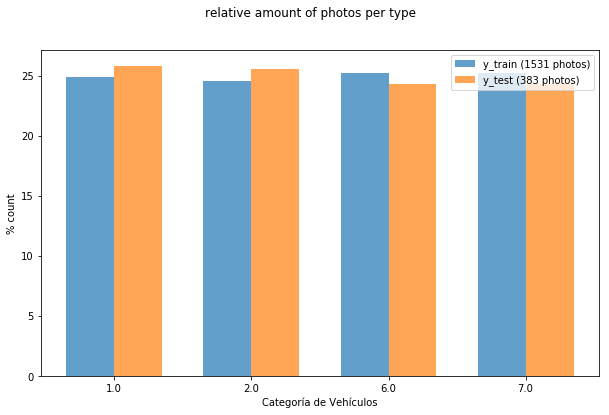

In [115]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5

    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]

    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'

    xtemp = np.arange(len(unique))
    
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique)
    plt.xlabel('Categoría de Vehículos')
    plt.ylabel(ylabel_text)

plt.figure(figsize=(10,6)) 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
legend1 = plt.legend([
    'y_train ({0} photos)'.format(len(y_train)),
    'y_test ({0} photos)'.format(len(y_test))
])
#legend2 = plt.legend([
 #   '1 = auto',
  #  '8 = moto'
#],loc=1)
#plt.gca().add_artist(legend1)
#plt.gca().add_artist(legend2)

In [5]:
componentes = PCA(n_components = 2).fit_transform(X_train)

In [20]:
plt.rcParams["figure.figsize"] = [21, 18]

In [21]:
class_names = np.unique(y_test)
class_names

array([1., 2., 6., 7.])

In [32]:
labels = ['Auto', 'Camioneta', 'Furgon', 'Moto']

colors = ['rgb(0,31,63)', 'rgb(255,133,27)', 'rgb(255,65,54)', 'rgb(0,116,217)', 'rgb(133,20,75)', 'rgb(57,204,204)',
'rgb(240,18,190)', 'rgb(46,204,64)', 'rgb(1,255,112)', 'rgb(255,220,0)',
'rgb(76,114,176)', 'rgb(85,168,104)', 'rgb(129,114,178)', 'rgb(100,181,205)']

In [23]:
for k, i in enumerate(class_names):
    print(k,i)

0 1.0
1 2.0
2 6.0
3 7.0


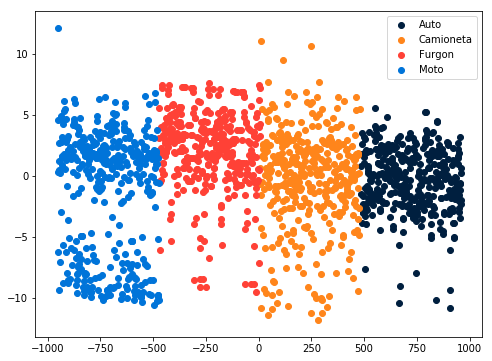

In [24]:
for k, i in enumerate(class_names):
    plt.scatter(componentes[y_train == i, 0],
               componentes[y_train == i, 1],
               color = '#%02x%02x%02x' % literal_eval(colors[k][3:]),label = labels[k])
plt.legend()
plt.show()

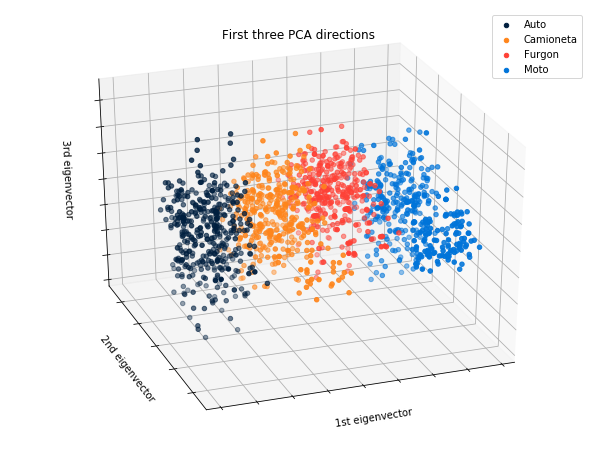

In [54]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))

ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X_train)



for k, i in enumerate(class_names):
    ax.scatter(X_reduced[y_train == i, 0],
               X_reduced[y_train == i, 1],
               X_reduced[y_train == i, 2],
               color = '#%02x%02x%02x' % literal_eval(colors[k][3:]),label = labels[k])
    


ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.legend()
plt.show()





In [33]:
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    print(name,label)

Setosa 0
Versicolour 1
Virginica 2


In [34]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [141]:
### Entrenamos la maquina Dummy ###
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

clf = DummyClassifier(strategy='prior',random_state=0)
clf.fit(X_train, y_train)
dummy_predict = clf.predict(X_test)
print(classification_report(y_test, dummy_predict))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        99
         2.0       0.00      0.00      0.00        98
         6.0       0.24      1.00      0.39        93
         7.0       0.00      0.00      0.00        93

   micro avg       0.24      0.24      0.24       383
   macro avg       0.06      0.25      0.10       383
weighted avg       0.06      0.24      0.09       383



c:\users\asus\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [145]:
from sklearn.svm import SVC 

svclassifier_poly = SVC(kernel='poly', degree=2, gamma='scale')  # Kernel polinómico
svclassifier_poly.fit(X_train, y_train) 
y_pred_poly = svclassifier_poly.predict(X_test)
print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

         1.0       0.99      1.00      0.99        99
         2.0       1.00      0.99      0.99        98
         6.0       1.00      1.00      1.00        93
         7.0       1.00      1.00      1.00        93

   micro avg       1.00      1.00      1.00       383
   macro avg       1.00      1.00      1.00       383
weighted avg       1.00      1.00      1.00       383



In [158]:
img = cv2.imread('imagenes/camioneta.jpg')
resize_img=cv2.resize(img, (28,28))
resize_img = cv2.cvtColor(resize_img,cv2.COLOR_BGR2GRAY) 
                    
# Normalización DE PIXELES, DIVIDO CADA PIXEL POR 255,
resize_img = resize_img / 255 
array_img = resize_img.ravel()
array_img = np.insert(array_img,len(array_img), 6)

Xnew = []
Xnew.append(array_img)
ynew = svclassifier_poly.predict(Xnew)
print(ynew) #---> TE DICE A QUE CLASE PERTENECE ........ 

[1.]
